In [15]:
# %% [1] Gerekli Kütüphaneler ve Ayarlar
import sys
import os
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [3]:
# Proje içindeki modülleri import etmek için sys.path ayarı
sys.path.append(os.path.abspath("../src/utils"))
sys.path.append(os.path.abspath("../src"))

In [4]:
# Proje modüllerini import et
from source.utils.logger import setup_logger
from source.eda_exploration import (
    load_data,
    basic_info,
    missing_values,
    distribution_analysis,
    correlation_analysis,
    detect_outliers,
)


In [7]:
# Logger ayarı
logger = setup_logger(name="eda_notebook", log_file="../logs/eda_notebook.log", log_level="INFO")

In [8]:
# %% [2] Veri Setini Yükleme
file_path = "../data/processed/epa_long_preprocessed.csv"
try:
    df = load_data(file_path)
    logger.info("Data successfully loaded.")
except Exception as e:
    logger.error(f"Error loading data: {e}")
    raise

INFO:source.eda_exploration:Loading data from ../data/processed/epa_long_preprocessed.csv
/Users/dogaaydin/PycharmProjects/Geo_Sentiment_Climate/source/eda_exploration.py:25: DtypeWarning: Columns (24) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)
INFO:source.eda_exploration:Data loaded successfully
2024-12-31 13:46:12,603 - eda_notebook - INFO - Data successfully loaded.
INFO:eda_notebook:Data successfully loaded.


In [9]:
# %% [3] Temel Bilgileri Görüntüleme
try:
    basic_info_dict = basic_info(df)
    logger.info("Basic info generated successfully.")
    display(basic_info_dict)
except Exception as e:
    logger.error(f"Error generating basic info: {e}")

2024-12-31 13:46:15,872 - eda_notebook - INFO - Basic info generated successfully.
INFO:eda_notebook:Basic info generated successfully.


{'Shape': (462760, 27),
 'Columns': ['Date',
  'Source',
  'Site ID',
  'POC',
  'Daily Max 1-hour SO2 Concentration',
  'Units',
  'Daily AQI Value',
  'Local Site Name',
  'Daily Obs Count',
  'Percent Complete',
  'AQS Parameter Code',
  'AQS Parameter Description',
  'Method Code',
  'CBSA Code',
  'CBSA Name',
  'State FIPS Code',
  'State',
  'County FIPS Code',
  'County',
  'Site Latitude',
  'Site Longitude',
  'source_file',
  'Daily Max 8-hour Ozone Concentration',
  'Daily Mean PM2.5 Concentration',
  'Method Description',
  'Daily Max 8-hour CO Concentration',
  'Daily Max 1-hour NO2 Concentration'],
 'Data Types': {'Date': dtype('O'),
  'Source': dtype('O'),
  'Site ID': dtype('int64'),
  'POC': dtype('int64'),
  'Daily Max 1-hour SO2 Concentration': dtype('float64'),
  'Units': dtype('O'),
  'Daily AQI Value': dtype('int64'),
  'Local Site Name': dtype('O'),
  'Daily Obs Count': dtype('int64'),
  'Percent Complete': dtype('float64'),
  'AQS Parameter Code': dtype('int64'

INFO:source.eda_exploration:Analyzing missing values in the dataset


[INFO] Eksik Veri Yüzdeleri:
Date                                     0.000000
Source                                   0.000000
Site ID                                  0.000000
POC                                      0.000000
Daily Max 1-hour SO2 Concentration      79.641283
Units                                    0.000000
Daily AQI Value                          0.000000
Local Site Name                          3.824877
Daily Obs Count                          0.000000
Percent Complete                         0.000000
AQS Parameter Code                       0.000000
AQS Parameter Description                0.000000
Method Code                              0.000216
CBSA Code                                8.780361
CBSA Name                                8.780361
State FIPS Code                          0.000000
State                                    0.000000
County FIPS Code                         0.000000
County                                   0.000000
Site Latitude        

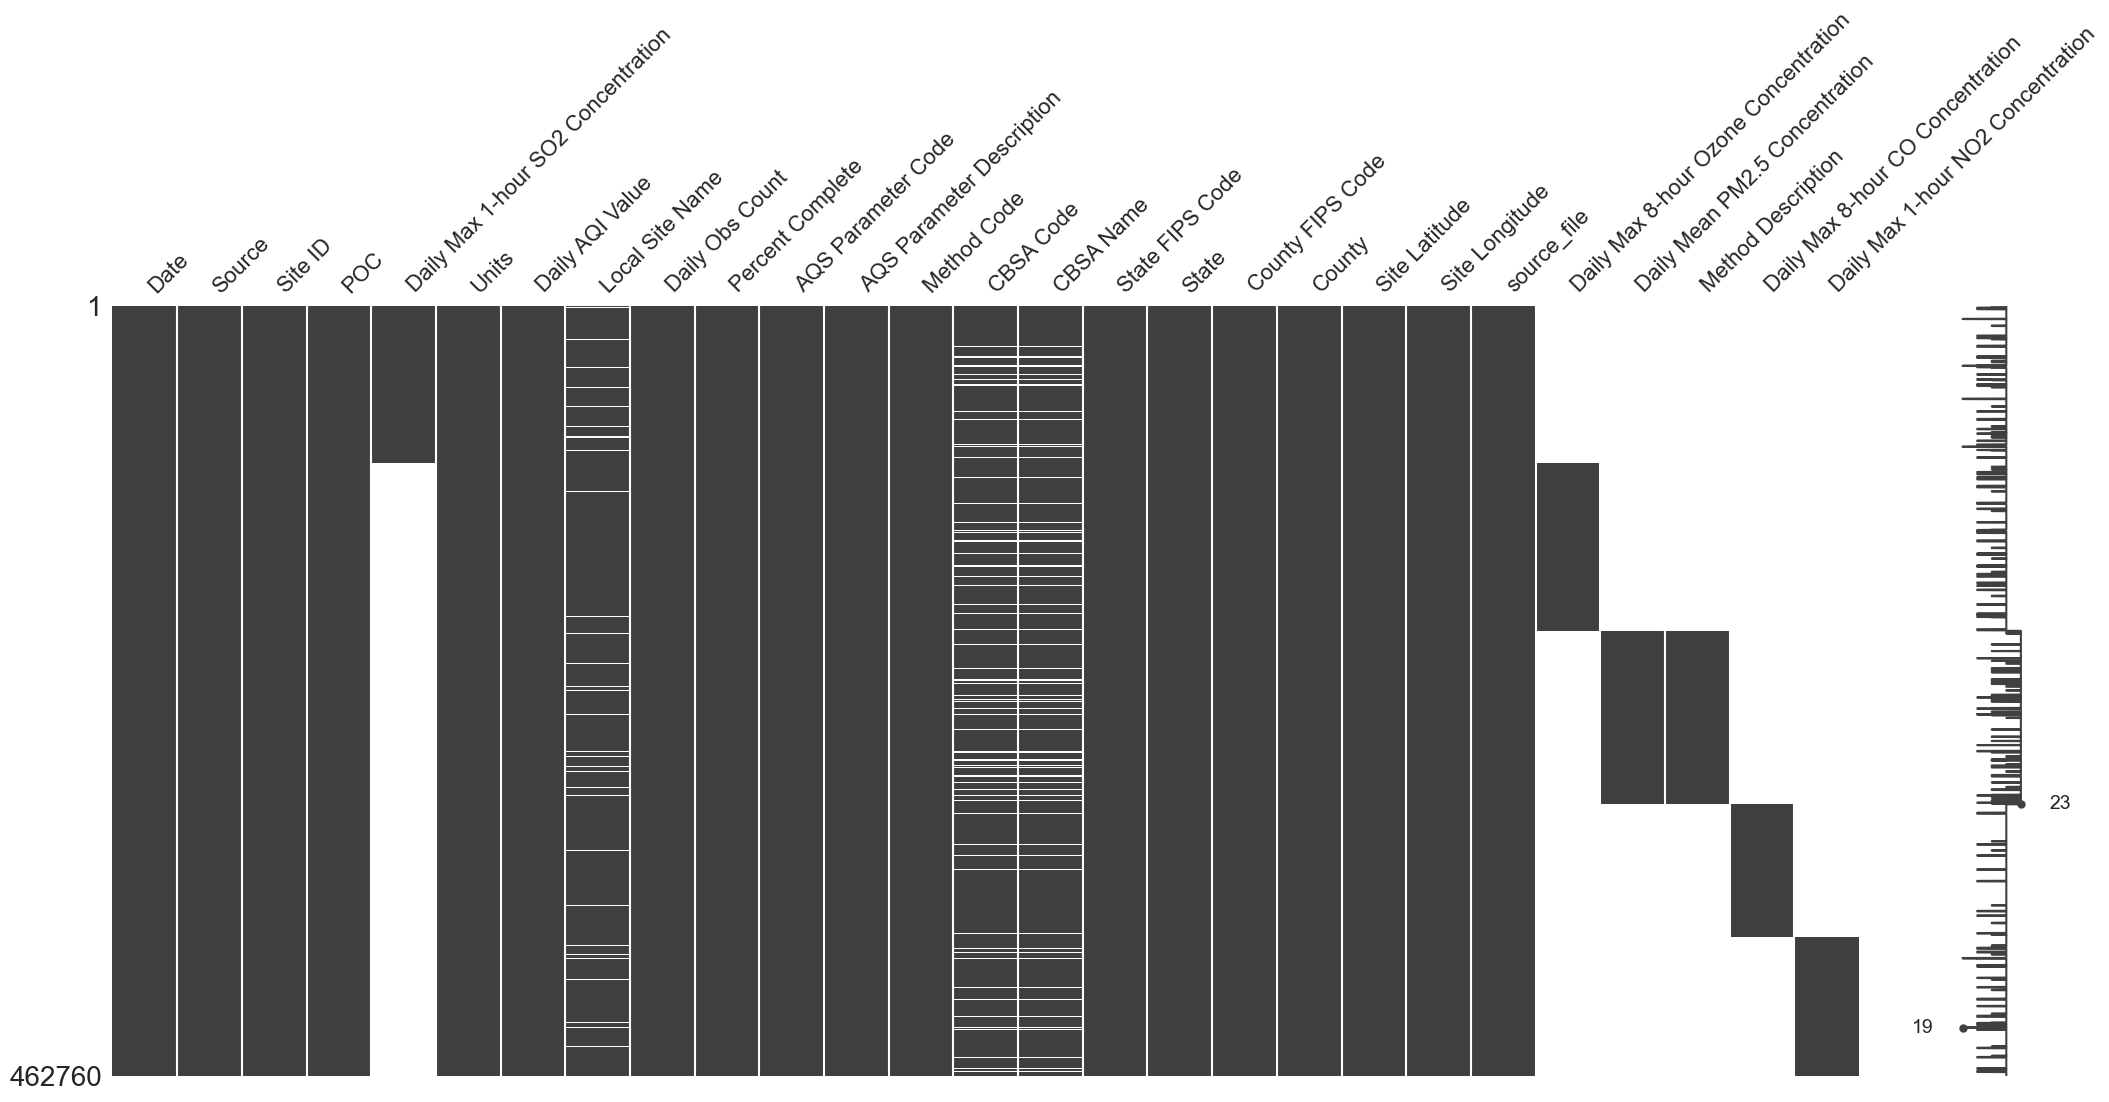

2024-12-31 13:46:21,002 - eda_notebook - INFO - Missing values analyzed successfully.
INFO:eda_notebook:Missing values analyzed successfully.


In [10]:
# %% [4] Eksik Değer Analizi
try:
    missing_values(df)
    logger.info("Missing values analyzed successfully.")
except Exception as e:
    logger.error(f"Error analyzing missing values: {e}")

2024-12-31 13:46:23,368 - eda_notebook - INFO - Numeric columns identified: ['Site ID', 'POC', 'Daily Max 1-hour SO2 Concentration', 'Daily AQI Value', 'Daily Obs Count', 'Percent Complete', 'AQS Parameter Code', 'Method Code', 'CBSA Code', 'State FIPS Code', 'County FIPS Code', 'Site Latitude', 'Site Longitude', 'Daily Max 8-hour Ozone Concentration', 'Daily Mean PM2.5 Concentration', 'Daily Max 8-hour CO Concentration', 'Daily Max 1-hour NO2 Concentration']
INFO:eda_notebook:Numeric columns identified: ['Site ID', 'POC', 'Daily Max 1-hour SO2 Concentration', 'Daily AQI Value', 'Daily Obs Count', 'Percent Complete', 'AQS Parameter Code', 'Method Code', 'CBSA Code', 'State FIPS Code', 'County FIPS Code', 'Site Latitude', 'Site Longitude', 'Daily Max 8-hour Ozone Concentration', 'Daily Mean PM2.5 Concentration', 'Daily Max 8-hour CO Concentration', 'Daily Max 1-hour NO2 Concentration']
INFO:source.eda_exploration:Performing distribution analysis for numeric columns


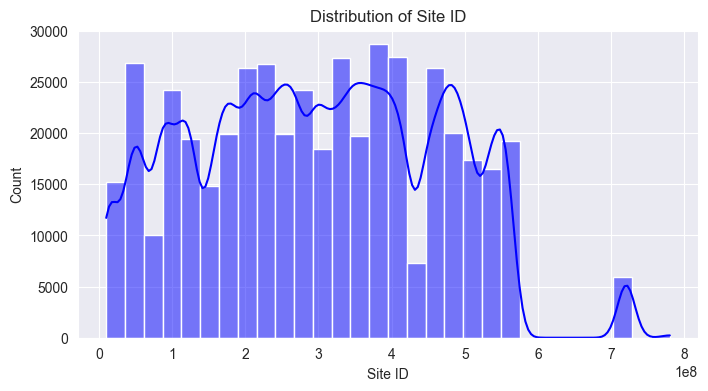

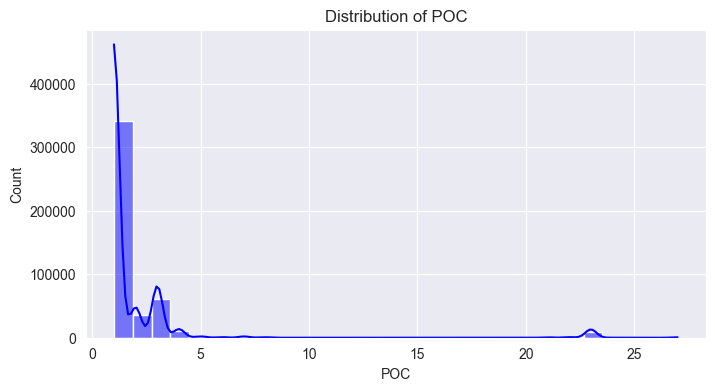

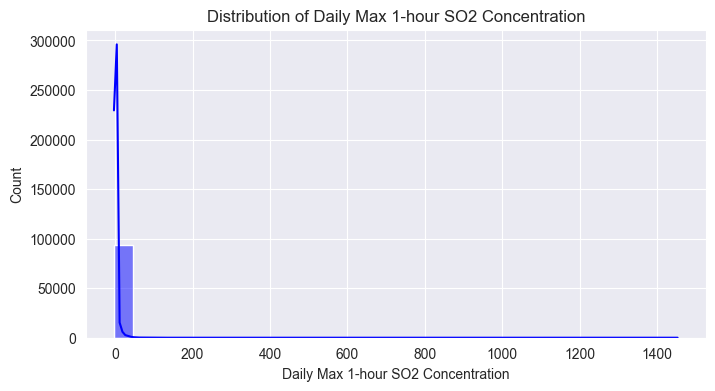

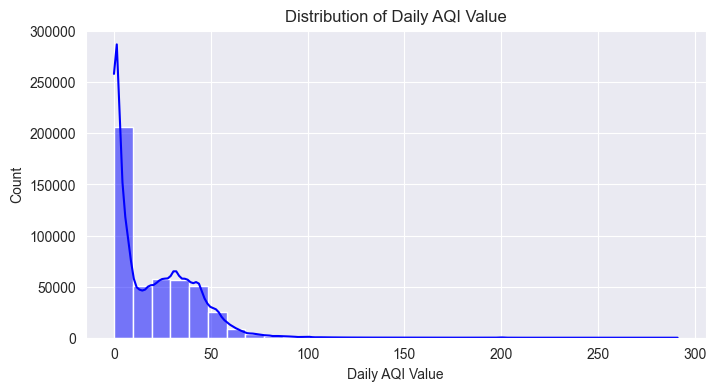

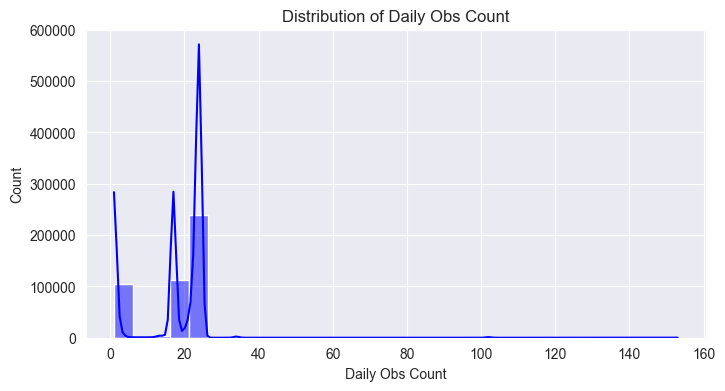

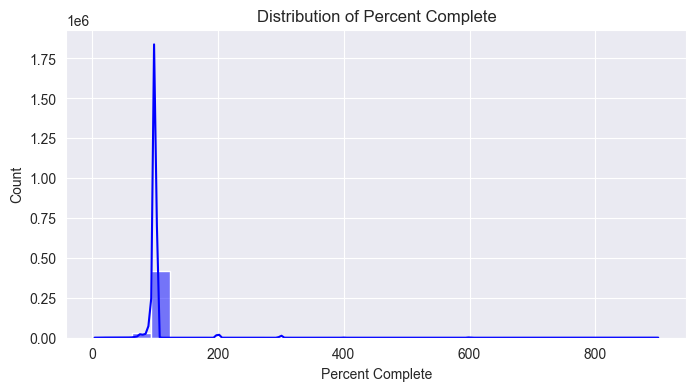

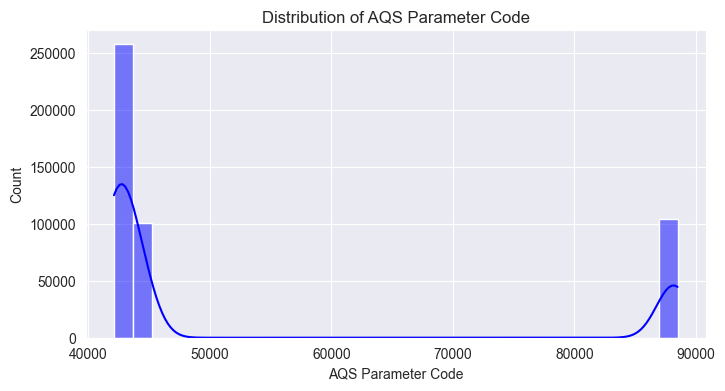

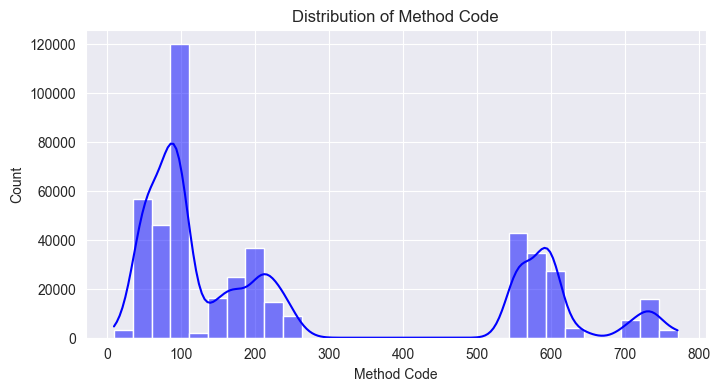

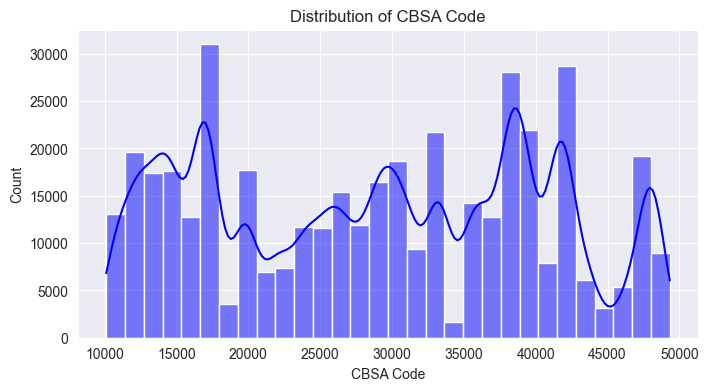

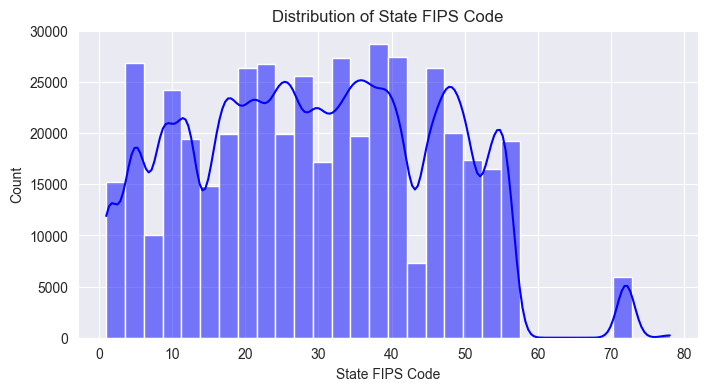

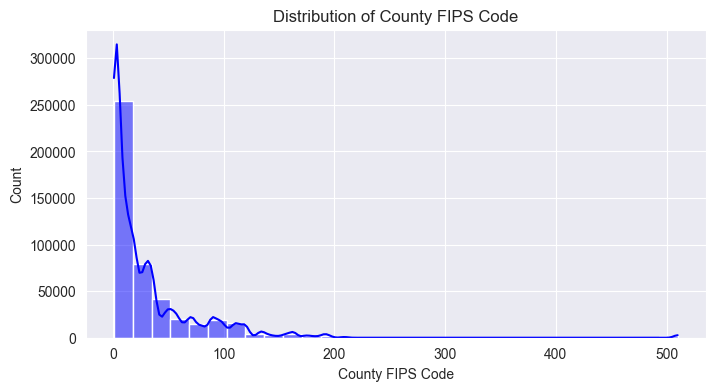

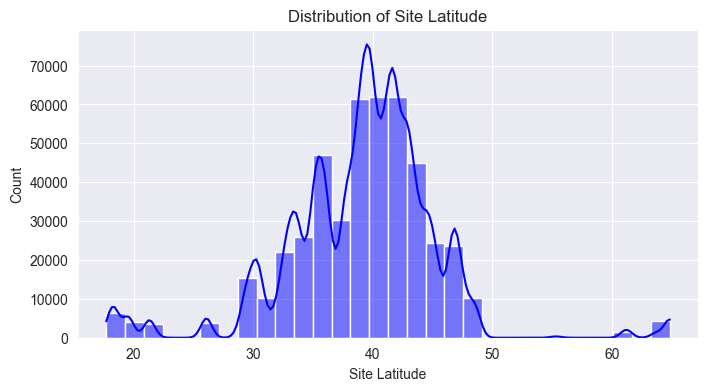

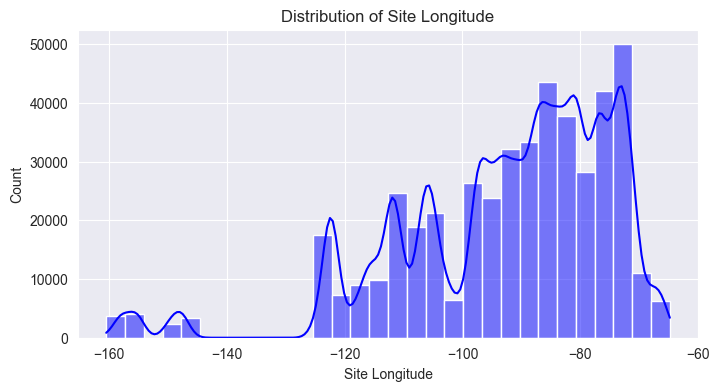

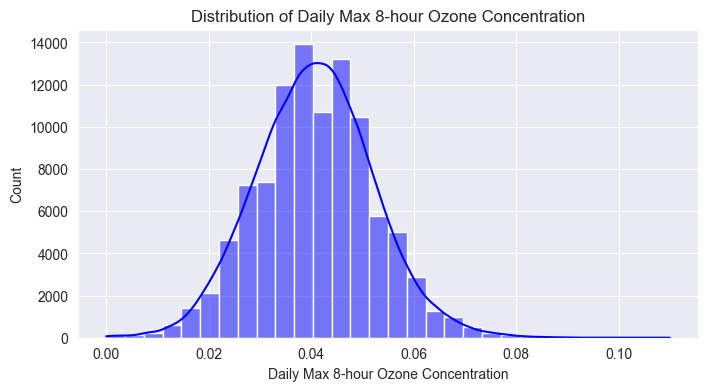

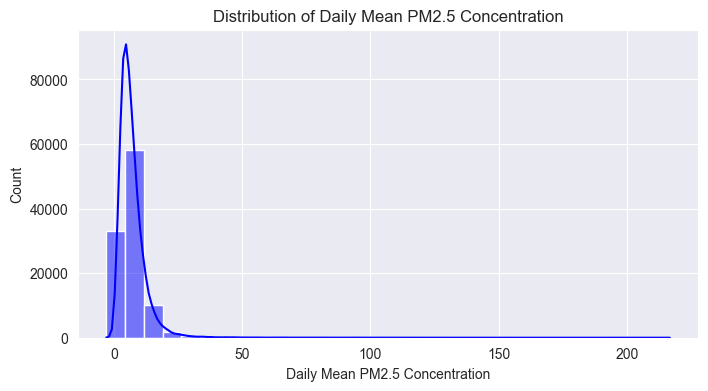

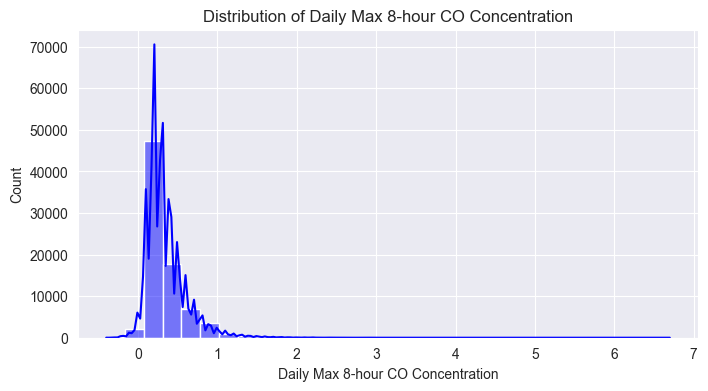

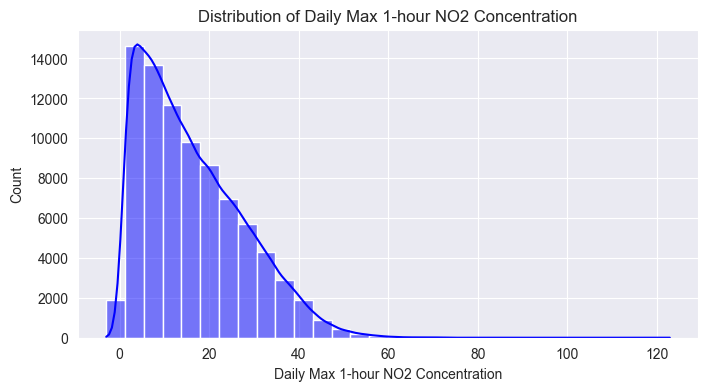

In [11]:
# %% [5] Dağılım Analizi
try:
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    logger.info(f"Numeric columns identified: {numeric_cols}")
    distribution_analysis(df, numeric_cols)
except Exception as e:
    logger.error(f"Error in distribution analysis: {e}")

INFO:source.eda_exploration:Creating correlation matrix for numeric columns


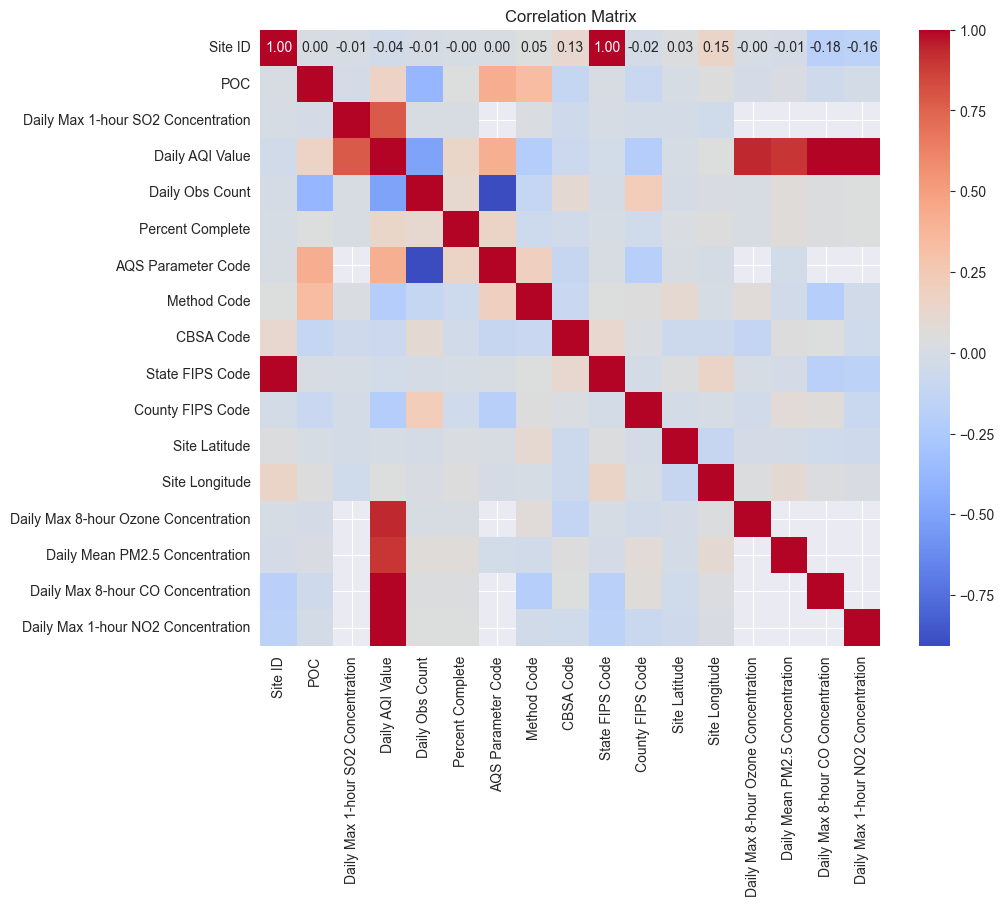

2024-12-31 13:46:37,111 - eda_notebook - INFO - Correlation analysis completed successfully.
INFO:eda_notebook:Correlation analysis completed successfully.


In [12]:
# %% [6] Korelasyon Analizi
try:
    correlation_analysis(df, numeric_cols)
    logger.info("Correlation analysis completed successfully.")
except Exception as e:
    logger.error(f"Error in correlation analysis: {e}")

INFO:source.eda_exploration:Detecting outliers in numeric columns


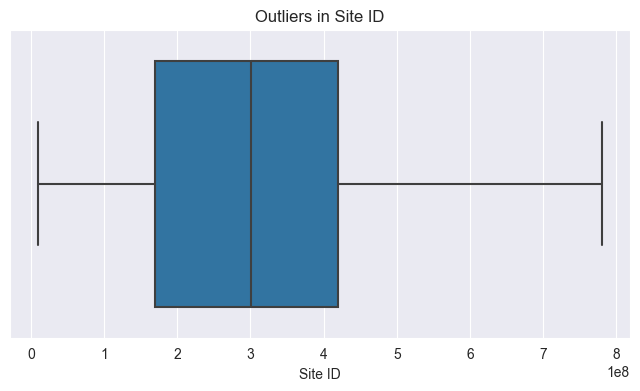

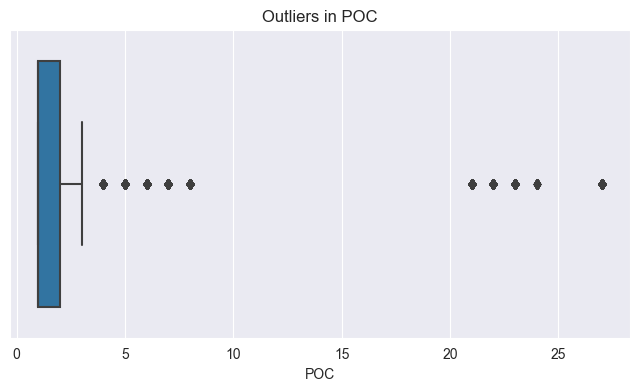

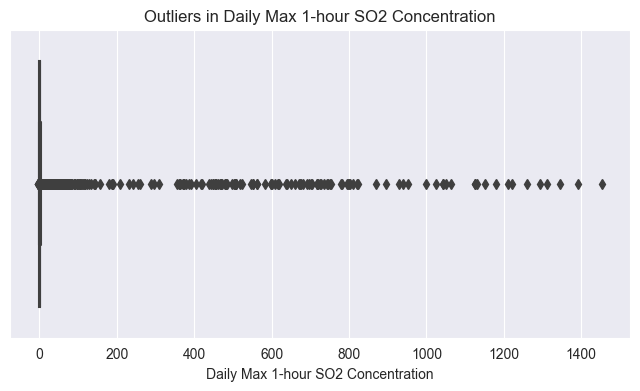

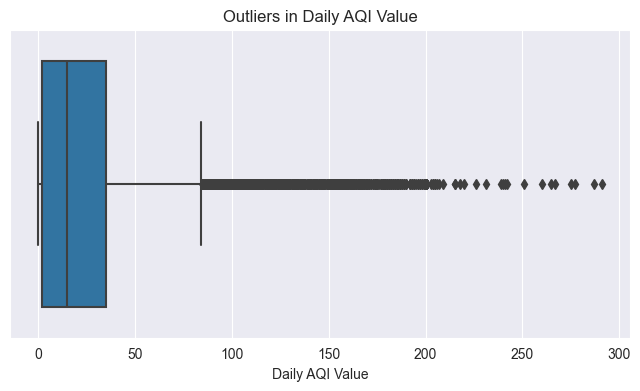

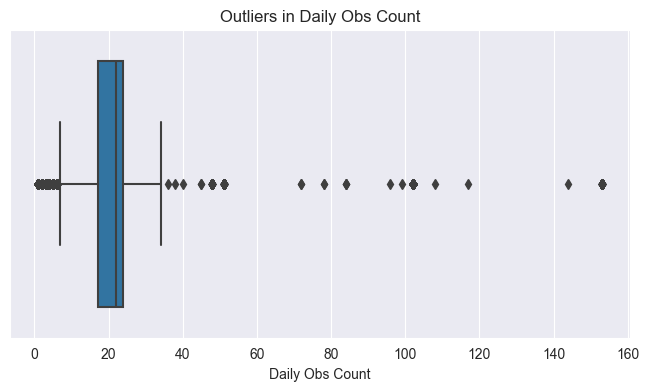

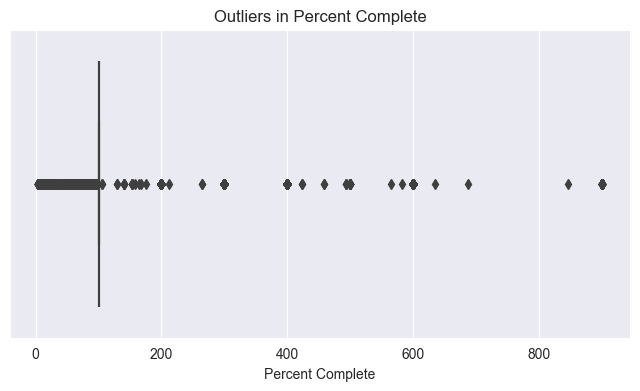

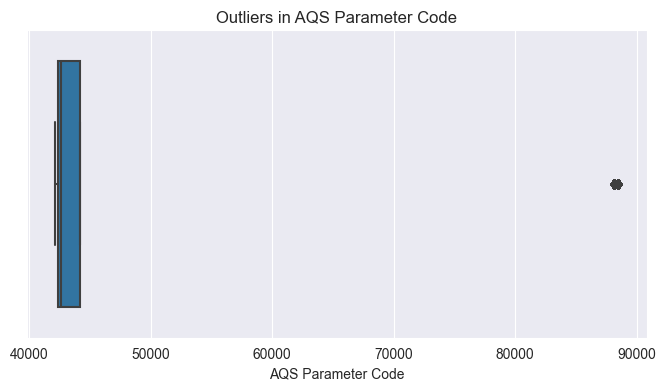

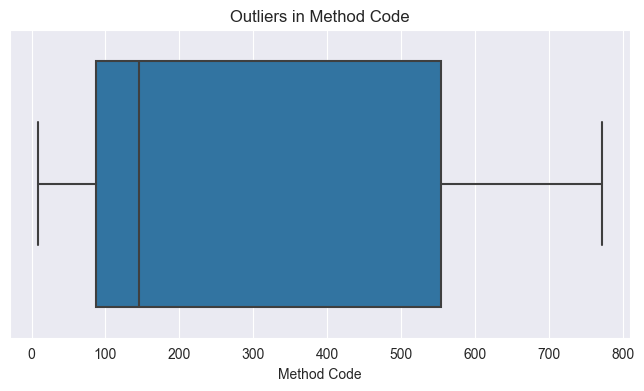

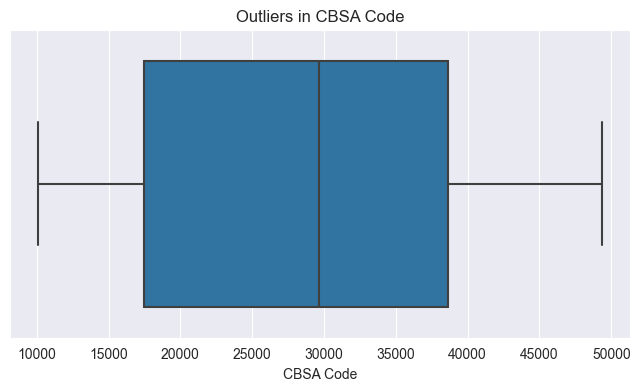

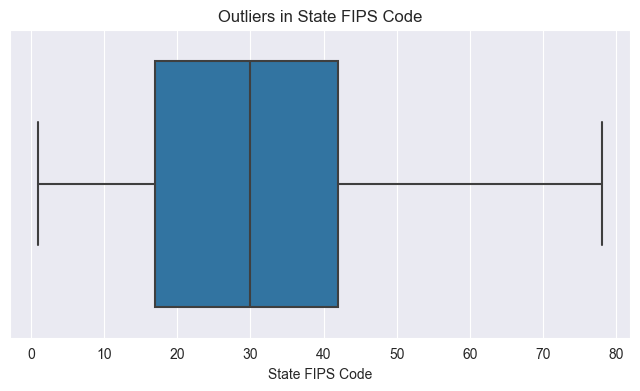

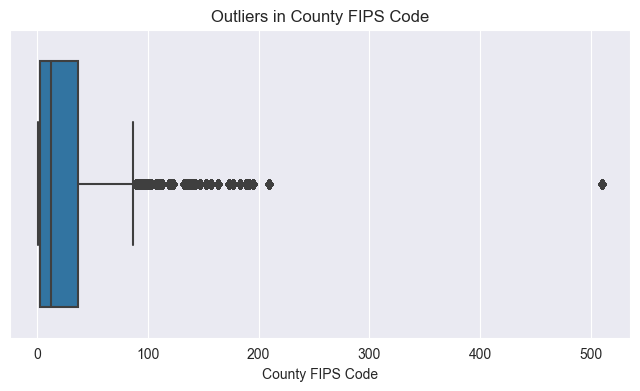

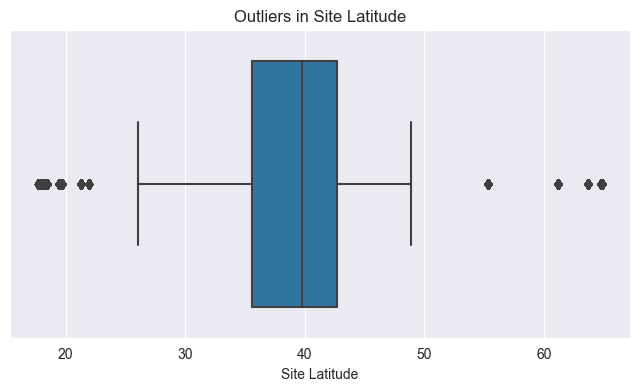

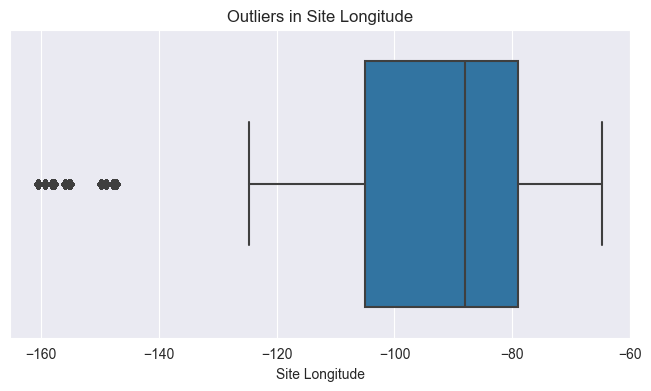

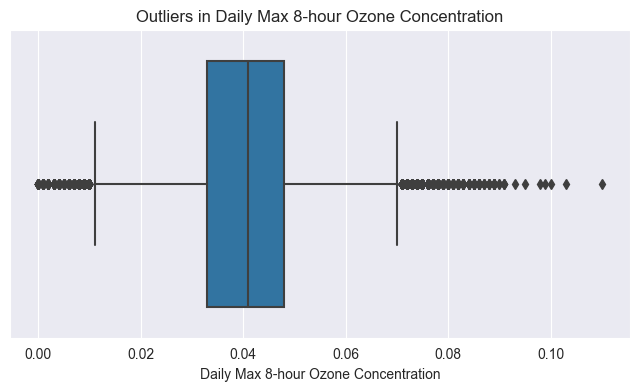

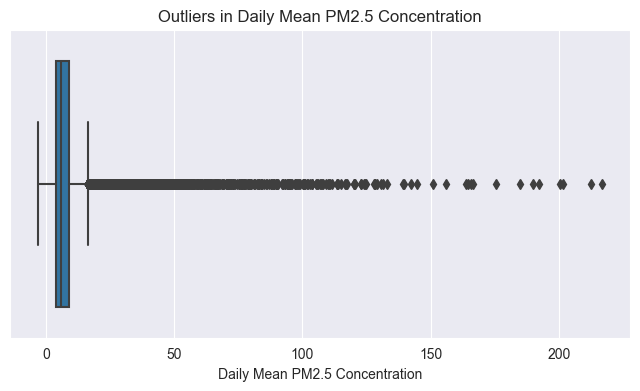

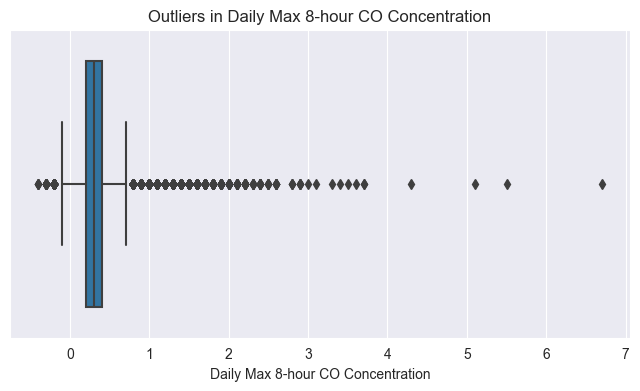

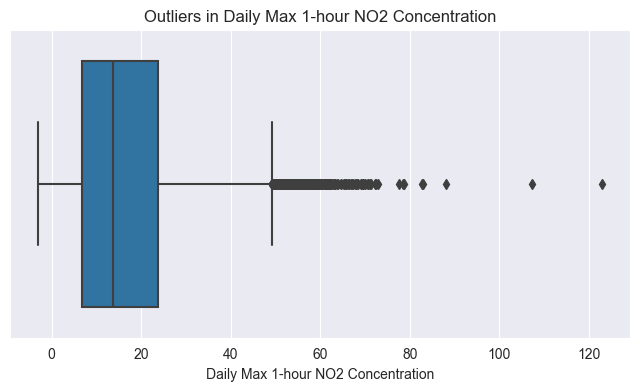

2024-12-31 13:46:43,213 - eda_notebook - INFO - Outlier detection completed successfully.
INFO:eda_notebook:Outlier detection completed successfully.


In [13]:
# %% [7] Aykırı Değer Analizi
try:
    detect_outliers(df, numeric_cols)
    logger.info("Outlier detection completed successfully.")
except Exception as e:
    logger.error(f"Error in outlier detection: {e}")

In [14]:
# %% [8] Notebook Sonu
logger.info("EDA notebook completed.")

2024-12-31 13:46:49,041 - eda_notebook - INFO - EDA notebook completed.
INFO:eda_notebook:EDA notebook completed.
